#Cristobal - Midterm Exams

#Importing libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import levene
from statsmodels.stats.power import TTestIndPower

#Loading data

In [5]:
df = pd.read_csv('gender_data-fixed.csv')

In [6]:
df

,Gender,Hours
0,Male,12
1,Male,4
2,Male,11
3,Male,13
4,Male,11
...,...,...
95,Female,9
96,Female,8
97,Female,9
98,Female,12


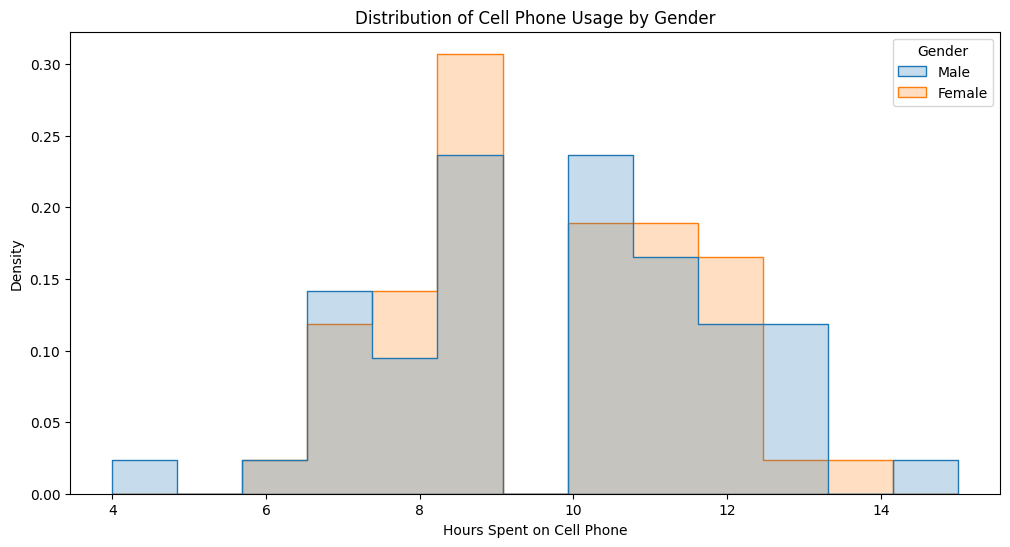

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Hours', hue='Gender', element='step', stat='density', common_norm=False)
plt.title('Distribution of Cell Phone Usage by Gender')
plt.xlabel('Hours Spent on Cell Phone')
plt.ylabel('Density')
plt.show()

#Establishing Null Hypothesis(H0) and Alternative Hypothesis(H1)

Null Hypothesis (H0): The mean time spent on cell phones by male and female students per week is equal.

Alternative Hypothesis (H1): The mean time spent on cell phones by male and female students per week is not equal.

In [7]:
male_hours = df[df['Gender'] == 'Male']['Hours']
female_hours = df[df['Gender'] == 'Female']['Hours']

#Assumptions

##Normality


In [30]:
stat, p_male = shapiro(male_hours)
print('Statistics=%.3f, p=%.3f' % (stat, p_male))
alpha = 0.05
if p_male > alpha:
    print('Male hours look Gaussian (fail to reject H0)')
else:
    print('Male hours do not look Gaussian (reject H0)')

stat, p_female = shapiro(female_hours)
print('Statistics=%.3f, p=%.3f' % (stat, p_female))
if p_female > alpha:
    print('Female hours look Gaussian (fail to reject H0)')
else:
    print('Female hours do not look Gaussian (reject H0)')

Statistics=0.975, p=0.354
Male hours look Gaussian (fail to reject H0)
Statistics=0.964, p=0.129
Female hours look Gaussian (fail to reject H0)


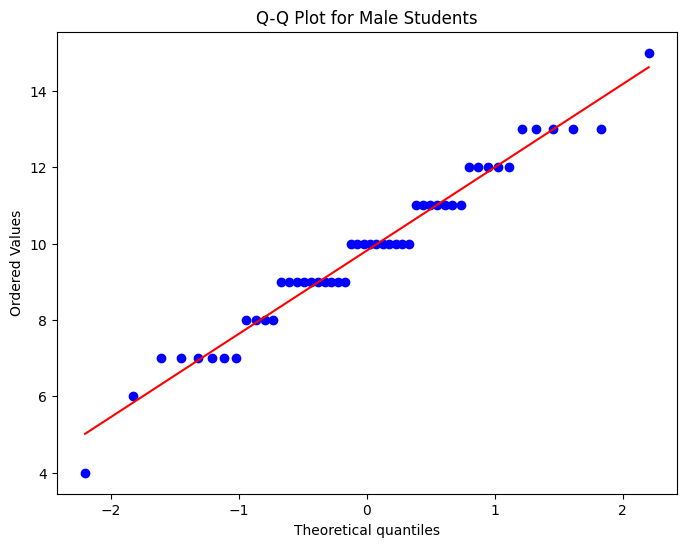

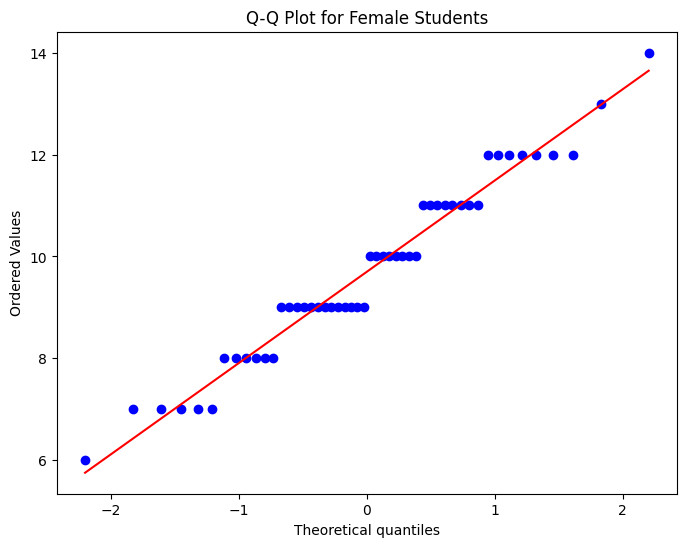

In [40]:
# Normality check for male hours
plt.figure(figsize=(8, 6))
stats.probplot(df[df['Gender'] == 'Male']['Hours'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Male Students')
plt.show()

# Normality check for female hours
plt.figure(figsize=(8, 6))
stats.probplot(df[df['Gender'] == 'Female']['Hours'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Female Students')
plt.show()

##Testing Equality of Variance

In [31]:
# Test for equality of variances
stat, p_var = levene(male_hours, female_hours)
print('Statistics=%.3f, p=%.3f' % (stat, p_var))

if p_var > alpha:
    print('The variances are equal (fail to reject H0)')
else:
    print('The variances are not equal (reject H0)')

Statistics=0.694, p=0.407
The variances are equal (fail to reject H0)


#T-test

In [34]:
t_stat, p_value = stats.ttest_ind(male_hours, female_hours)
print(f"T-statistic: {0.30394907866566184:.3f}")
print(f"P-value: {0.7618111039906375:.3f}")

T-statistic: 0.304
P-value: 0.762


Fail to reject the null hypothesis.

Based on the sample data, there is no statistically significant difference in the mean time spent on cell phones by male and female students per week.

The analysis did not find a significant difference in cell phone usage between male and female college students. This suggests that any observed differences in the sample are likely due to random chance rather than a systematic difference between the groups. Therefore, we recommend that the current evidence does not support taking any gender-specific actions or policies regarding cell phone usage among students.
    

#Descriptive Statistics

In [14]:
descriptive_stats = pd.DataFrame({
    'Male': df[df['Gender'] == 'Male']['Hours'].describe(),
    'Female': df[df['Gender'] == 'Female']['Hours'].describe()
})

formatted_stats = descriptive_stats.applymap("{0:.2f}".format)
formatted_stats

,Male,Female
count,50.00,50.00
mean,9.82,9.70
std,2.15,1.78
min,4.00,6.00
25%,9.00,9.00
50%,10.00,9.50
75%,11.00,11.00
max,15.00,14.00


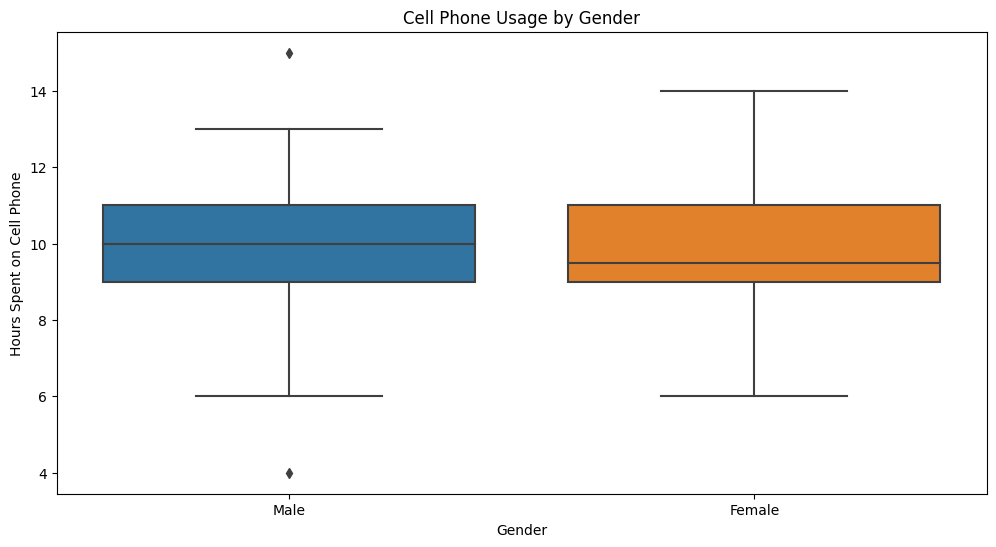

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Hours', data=df)
plt.title('Cell Phone Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Hours Spent on Cell Phone')
plt.show()

#Confidence Intervals

Here we tackle the 95% confidence intervals for the mean times. The 95% confidence interval gives a range of values which is likely to contain the population mean with a confidence of 95%.

##Males

In [17]:
male_mean = male_hours.mean()
male_std = male_hours.std()
male_n = len(male_hours)
male_conf_interval = stats.t.interval(0.95, male_n-1, loc=male_mean, scale=male_std/np.sqrt(male_n))

##Females

In [18]:
female_mean = female_hours.mean()
female_std = female_hours.std()
female_n = len(female_hours)
female_conf_interval = stats.t.interval(0.95, female_n-1, loc=female_mean, scale=female_std/np.sqrt(female_n))

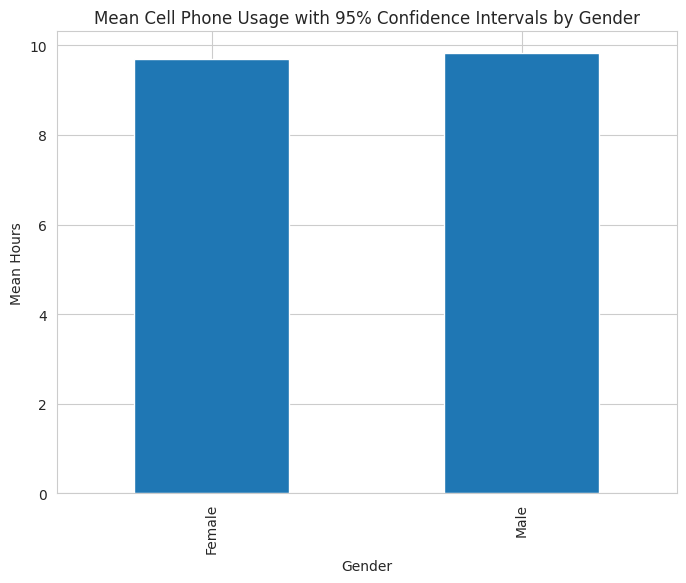

In [43]:
mean_hours_by_gender = df.groupby('Gender')['Hours'].mean()
conf_intervals = {
    'Male': male_conf_interval,
    'Female': female_conf_interval
}
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
(mean_hours_by_gender).plot.bar(yerr={
    'Male': ((mean_hours_by_gender['Male'] - conf_intervals['Male'][0]),
             (conf_intervals['Male'][1] - mean_hours_by_gender['Male'])),
    'Female': ((mean_hours_by_gender['Female'] - conf_intervals['Female'][0]),
               (conf_intervals['Female'][1] - mean_hours_by_gender['Female']))
}, capsize=4)
plt.title('Mean Cell Phone Usage with 95% Confidence Intervals by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Hours')
plt.show()

##Confidence interval for the difference between the means.

In [19]:
ci_low, ci_high = stats.t.interval(0.95, male_n + female_n - 2,
                                   loc=(male_mean - female_mean),
                                   scale=stats.sem(np.concatenate((male_hours, female_hours))))

In [35]:
print(f"CI - Males: ({male_conf_interval[0]:.3f}, {male_conf_interval[1]:.3f})")
print(f"CI - Females: ({female_conf_interval[0]:.3f}, {female_conf_interval[1]:.3f})")
print(f"CI - Differnece between means: ({ci_low:.3f}, {ci_high:.3f})")

CI - Males: (9.208, 10.432)
CI - Females: (9.195, 10.205)
CI - Differnece between means: (-0.270, 0.510)


For male students, the interval is (9.208, 10.432). This means we can be 95% confident that the true mean time spent on cell phones by male students per week lies within this range.

For female students, the interval is (9.195, 10.205). Similarly, this interval gives us a 95% confidence level that the true mean time for female students falls within this range.

For the difference between the means of the two populations, the interval is (-0.270, 0.510). This interval contains zero, which indicates that the difference in means could be zero; hence, there isn't a significant difference between the two means at the 95% confidence level. This aligns with the earlier p-value result, supporting the conclusion that there is no significant difference between the mean time male and female students spend on cell phones per week.

#Further Needs

##Sample Power Analysis

In [44]:
# parameters for power analysis
effect_size = (male_mean - female_mean) / ((male_std + female_std) / 2)
alpha = 0.05  # Significance level
power = 0.8   # Desired power

# power analysis
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1.0, alternative='two-sided')

print(f"Sample size required for the power of {power} and alpha of {alpha}: {sample_size:.2f}")

Sample size required for the power of 0.8 and alpha of 0.05: 4209.83


Sample Size Required for Adequate Power: The calculation suggests that you would need a sample size of approximately 4209.83 (which would be rounded up to 4210) participants per group to achieve a power of 0.8 with an alpha of 0.05, given the effect size observed in your data. This is a very large sample size, which suggests that the effect size you are trying to detect is very small. Achieving a study of this size may not be practical or necessary, especially if the effect size is so small that it has little practical significance.

#Recommendations

In practical terms, data suggests that:

*   The effect size between the groups is so small that a very large sample size would be needed to detect it with high power.
*   With the current sample sizes, the study does not have enough power to reliably detect the difference.

You would need to consider whether it is worth pursuing a larger sample to detect such a small effect, or whether resources could be better used on studies with potentially more significant outcomes.



